In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

prices_round_2_day_1 = pandas.read_csv("data/island-data-bottle-round-2/prices_round_2_day_1.csv", delimiter=";")
prices_round_2_day_0 = pandas.read_csv("data/island-data-bottle-round-2/prices_round_2_day_0.csv", delimiter=";")
prices_round_2_day_neg1 = pandas.read_csv("data/island-data-bottle-round-2/prices_round_2_day_-1.csv", delimiter=";")

ser = pandas.Series()
ser

/var/folders/xb/__9ct83s0jx0k7lh1412pv6m0000gr/T/ipykernel_73407/170004781.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ser = pandas.Series()


Series([], dtype: float64)

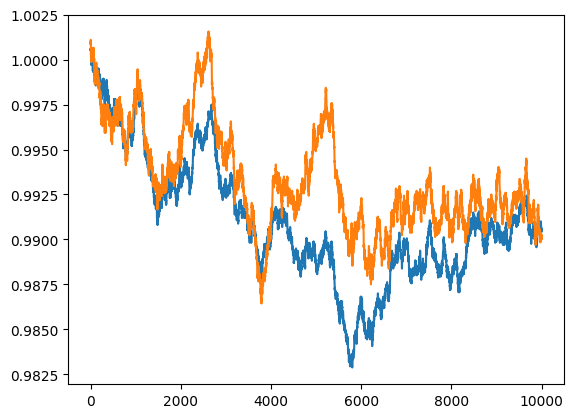

In [26]:
pina = prices_round_2_day_1[prices_round_2_day_1['product'] == 'PINA_COLADAS'].reset_index()
coco = prices_round_2_day_1[prices_round_2_day_1['product'] == 'COCONUTS'].reset_index()

standardized_pina_price = pina.mid_price / 15000
standardized_coco_price = coco.mid_price / 8000

x_vals = list(range(len(standardized_coco_price)))

plt.plot(x_vals, standardized_coco_price, x_vals, standardized_pina_price)


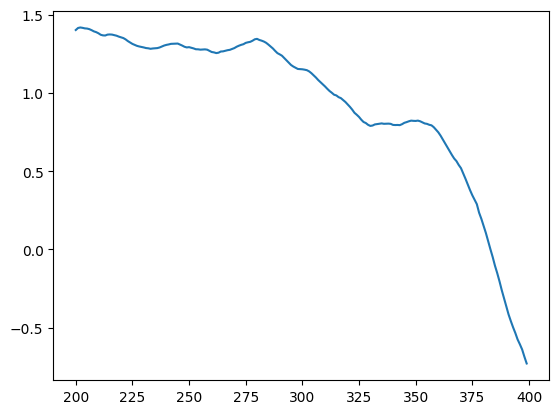

In [35]:
# plt.hist(np.array(standardized_coco_price) - np.array(standardized_pina_price))
ratio = standardized_coco_price.divide(standardized_pina_price)
# print(ratio)
df_zscore = (ratio - ratio.mean())/ratio.std()
# print(df_zscore)

small_window = 50
big_window = 200

ratios_mavg5 = ratio.rolling(window=small_window, center=False).mean()
ratios_mavg20 = ratio.rolling(window=big_window, center=False).mean()
# print(ratios_mavg5)
std_20 = ratio.rolling(window=big_window, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20

plt.plot(zscore_20_5[big_window:big_window*2])

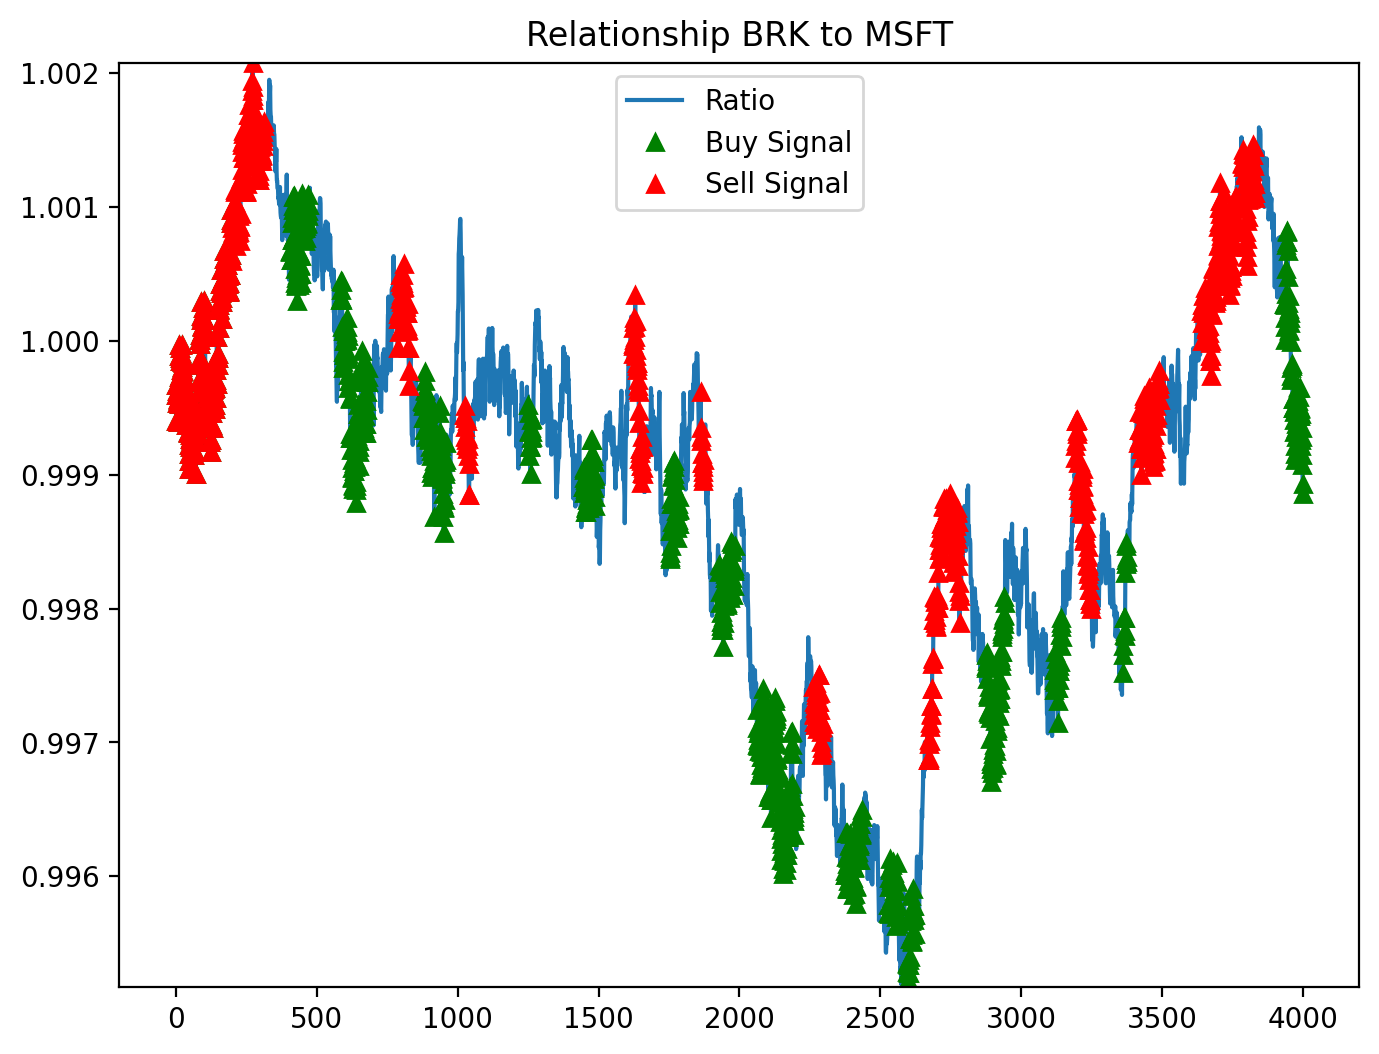

In [40]:
figure(figsize=(8, 6), dpi=200)

ratio_graph = ratio[:4000]

ratio_graph.plot()
buy = ratio_graph.copy()
sell = ratio_graph.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio_graph.min(), ratio_graph.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()

In [43]:
trading_matrix = \
[[1,    0.5,    1.45,   0.75],
 [1.95, 1,      3.1,    1.49],
 [0.67, 0.31,   1,      0.48],
 [1.34, 0.64,   1.98,   1]]
# from is on the right
# to is on the top

labels = ['pizza_slice', 'wasabi_root', 'snowball', 'shells']

1.34 * 0.5 * 3.1 * 0.67 * 0.75

1.0436925000000001

In [78]:
import json, sys, math
import networkx as nx

def parse_points(matrix, labels, add_num=0, iteration=1):
    '''
    Parameters:
    matrix - 2D list (m, m) of conversion rates between products
    labels - 1D list (m,) of product labels 
    '''
    edges = []

    for it in range(iteration):
        for jt in range(iteration):
            for i in range(len(labels)): # for row in matrix
                for j in range(len(labels)): # for column in matrix
                    if i != j:
                        edges.append((labels[i] + str(it), labels[j] + str(jt), -1.0 * math.log(float(matrix[i][j])) + add_num))
    return edges

def build_graph(parsed_points):
    dg = nx.DiGraph()
    dg.add_weighted_edges_from(parsed_points)
    return dg

def find_path(digraph, start="shells"):
    path = nx.single_source_bellman_ford(digraph, start)
    return path

def output_path(path, g, start="shells"):
    visited = set(start)
    tot=1.0
    pred = path[start]
    x = start
    while pred not in visited:
        print(pred, "-->", x, math.exp(-g[pred][x]['weight']))
        tot*=math.exp(-g[pred][x]['weight'])
        visited.add(pred)
        x = pred
        pred = path[pred]
    
    tot *= math.exp(-g[start][x]['weight'])
    print(start, "-->", x, math.exp(-g[start][x]['weight']))
    print("Total:", tot)
    if tot < 1.0:
        print("Note: no arbitrage opportunity detected.")

parsed_points = parse_points(trading_matrix, labels, add_num=0, iteration=2)
dg = build_graph(parsed_points)
print(parsed_points)
# path = nx.find_negative_cycle(dg, source='pizza_slice0')
path = nx.single_source_shortest_path(dg, source='shells0')
print(path['shells0'])
print(path['shells1'])
print(nx.shortest_path(dg, source='shells0', target='shells1', weight='weight'))
# path = find_path(dg)
# output_path(path, dg)

[('pizza_slice0', 'wasabi_root0', 0.6931471805599453), ('pizza_slice0', 'snowball0', -0.371563556432483), ('pizza_slice0', 'shells0', 0.2876820724517809), ('wasabi_root0', 'pizza_slice0', -0.6678293725756554), ('wasabi_root0', 'snowball0', -1.1314021114911006), ('wasabi_root0', 'shells0', -0.3987761199573678), ('snowball0', 'pizza_slice0', 0.40047756659712525), ('snowball0', 'wasabi_root0', 1.171182981502945), ('snowball0', 'shells0', 0.7339691750802004), ('shells0', 'pizza_slice0', -0.29266961396282004), ('shells0', 'wasabi_root0', 0.4462871026284195), ('shells0', 'snowball0', -0.6830968447064438), ('pizza_slice0', 'wasabi_root1', 0.6931471805599453), ('pizza_slice0', 'snowball1', -0.371563556432483), ('pizza_slice0', 'shells1', 0.2876820724517809), ('wasabi_root0', 'pizza_slice1', -0.6678293725756554), ('wasabi_root0', 'snowball1', -1.1314021114911006), ('wasabi_root0', 'shells1', -0.3987761199573678), ('snowball0', 'pizza_slice1', 0.40047756659712525), ('snowball0', 'wasabi_root1', 

ValueError: Contradictory paths found: negative weights?

In [77]:
sum = dg['shells0']['pizza_slice0']['weight'] + \
dg['pizza_slice0']['wasabi_root0']['weight'] + \
dg['wasabi_root0']['snowball0']['weight'] + \
dg['snowball0']['pizza_slice1']['weight'] + \
dg['pizza_slice1']['shells1']['weight'] 

print(sum)
print(1/math.exp(sum))

sum = dg['shells0']['pizza_slice0']['weight'] + \
dg['pizza_slice1']['shells1']['weight'] 

print(sum)
print(1/math.exp(sum))

-0.042764905845069257
1.0436925000000001
-0.00498754151103914
1.0050000000000001


dolphin mean 3057.751 diving mean 99177.78585


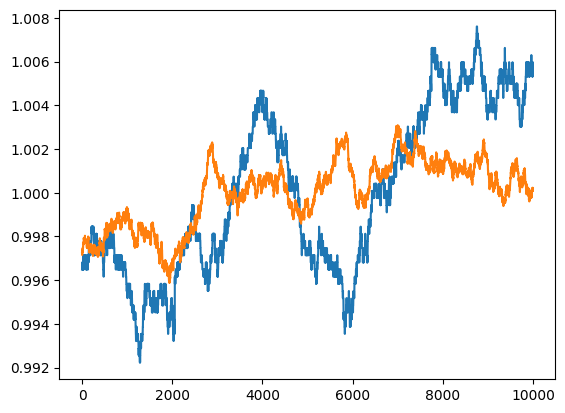

In [5]:
prices_round_3_day_1 = pandas.read_csv("data/island-data-bottle-round-3/prices_round_3_day_1.csv", delimiter=";")

dolphins = prices_round_3_day_1[prices_round_3_day_1['product'] == 'DOLPHIN_SIGHTINGS'].reset_index()
diving = prices_round_3_day_1[prices_round_3_day_1['product'] == 'DIVING_GEAR'].reset_index()

standardized_dolphins_price = dolphins.mid_price / np.mean(dolphins.mid_price)
standardized_diving_price = diving.mid_price / np.mean(diving.mid_price)

x_vals = list(range(len(standardized_dolphins_price)))

plt.plot(x_vals, standardized_dolphins_price, x_vals, standardized_diving_price)
print('dolphin mean', np.mean(dolphins.mid_price), 'diving mean', np.mean(diving.mid_price))


berries mean 3893.37645


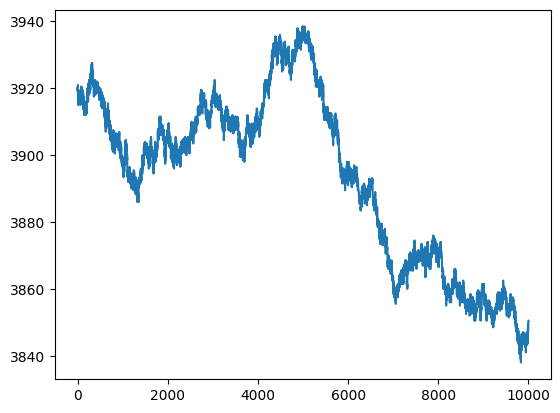

In [7]:
prices_round_3_day_1 = pandas.read_csv("data/island-data-bottle-round-3/prices_round_3_day_1.csv", delimiter=";")

berries = prices_round_3_day_1[prices_round_3_day_1['product'] == 'BERRIES'].reset_index()

x_vals = list(range(len(berries.mid_price)))

plt.plot(x_vals, berries.mid_price)
print('berries mean', np.mean(berries.mid_price))


[12334.15675, 7096.9094, 20682.72135, 74063.9448]


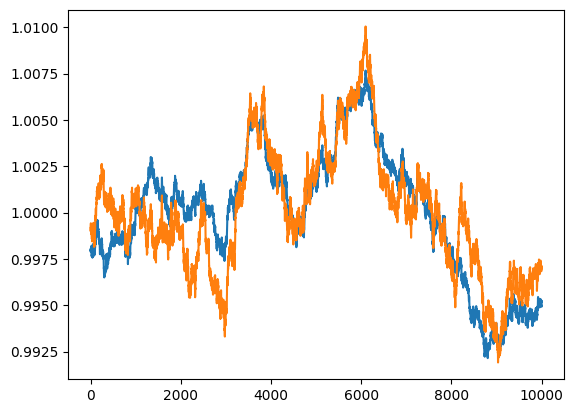

In [12]:
prices_round_4_day_1 = pandas.read_csv("data/island-data-bottle-round-4/prices_round_4_day_3.csv", delimiter=";")

baguette = prices_round_4_day_1[prices_round_4_day_1['product'] == 'BAGUETTE'].reset_index()
dip = prices_round_4_day_1[prices_round_4_day_1['product'] == 'DIP'].reset_index()
ukulele = prices_round_4_day_1[prices_round_4_day_1['product'] == 'UKULELE'].reset_index()
picnic = prices_round_4_day_1[prices_round_4_day_1['product'] == 'PICNIC_BASKET'].reset_index()

products = [baguette, dip, ukulele, picnic]
standardized_products = [product.mid_price / np.mean(product.mid_price) for product in products]

x_vals = list(range(len(standardized_products[0])))

plt.plot(x_vals, (standardized_products[0] + standardized_products[1] + standardized_products[2])/3, x_vals, standardized_products[3])
print([np.mean(product.mid_price) for product in products])
